### Step 1: Environment Setup
This cell checks the current working directory and lists the available files. It ensures the dataset or required files are present.

In [ ]:
import os

# Show current working directory
print("Current working directory:")
print(os.getcwd())

# List all files in this folder
print("\nFiles in this folder:")
print(os.listdir())

# Check if groceries.csv is here
if "groceries.csv" in os.listdir():
    print("\n✅ groceries.csv is in the correct folder!")
else:
    print("\n❌ groceries.csv not found here. Move it to this folder or change the path.")


Current working directory:
/content

Files in this folder:
['.config', 'sample_data']

❌ groceries.csv not found here. Move it to this folder or change the path.


### Step 2: Upload Dataset
Here we use Google Colab's `files.upload()` function to manually upload the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Groceries_dataset.csv to Groceries_dataset.csv


### Step 3: File Renaming
Renames the uploaded dataset file (`Groceries_dataset.csv`) to a simpler name (`groceries.csv`) for easier handling.

In [ ]:
import os
os.rename("Groceries_dataset.csv", "groceries.csv")


### Step 4: Import Libraries
All required libraries for data processing, visualization, and association rule mining are imported.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Plot style
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['axes.grid'] = True

# Paths
DATA_PATH = "groceries.csv"  # uploaded dataset name
OUTPUT_DIR = "."
FIG_DIR = os.path.join(OUTPUT_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

print("✅ Setup complete! Ready to load data.")


✅ Setup complete! Ready to load data.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### Step 5: Load Dataset
Loads the groceries dataset into a Pandas DataFrame and displays its shape and first few rows.

In [ ]:
# Load the dataset
df = pd.read_csv(DATA_PATH)

# Quick look at data
print("✅ Dataset Loaded!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

# Column info
print("\nColumn Names:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum().sum())


✅ Dataset Loaded!
Shape: (38765, 3)

First 5 rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Column Names:
['Member_number', 'Date', 'itemDescription']

Missing values:
0


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Step 6: Dataset Dimensions
Prints the number of transactions (rows) and the number of unique products (columns).

In [ ]:
# Number of transactions (rows) and unique products (columns)
print(f"Number of transactions: {df.shape[0]}")
print(f"Number of unique products: {df.shape[1]}")

# Count how many items per transaction
basket_sizes = df.sum(axis=1)
print("\nBasket Size Stats:")
print(basket_sizes.describe())

# Plot basket size distribution
plt.figure()
plt.hist(basket_sizes, bins=20, edgecolor='black')
plt.title("Basket Size Distribution")
plt.xlabel("Number of Items in Basket")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "basket_size_distribution.png"))
plt.show()

# Find top 10 most purchased items
item_totals = df.sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Purchased Items:")
print(item_totals)

# Plot top items
plt.figure()
sns.barplot(x=item_totals.values, y=item_totals.index)
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Number of Purchases")
plt.ylabel("Item")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_items.png"))
plt.show()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Number of transactions: 38765
Number of unique products: 3


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Step 7: Inspect Data
Displays the first 10 rows and basic info about the dataset, including column details.

In [ ]:
# Show column names and first few rows
print(df.head(10))
print("\nColumn Info:")
print(df.info())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
5           4941  14-02-2015        rolls/buns
6           4501  08-05-2015  other vegetables
7           3803  23-12-2015        pot plants
8           2762  20-03-2015        whole milk
9           4119  12-02-2015    tropical fruit

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Step 8: Data Transformation
Pivots the dataset into a format where each row corresponds to a customer and each column corresponds to an item. This format is required for Apriori algorithm.

In [ ]:
# Pivot the dataset: each row = Member_number (customer), columns = items
basket = df.groupby(['Member_number', 'itemDescription'])['itemDescription'] \
            .count().unstack().reset_index().fillna(0).set_index('Member_number')

# Convert quantities to 1/0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print("✅ Basket format created!")
print(basket.head())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Basket format created!
itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                                 0         0                 0   
1001                                 0         0                 0   
1002                                 0         0                 0   
1003                                 0         0                 0   
1004                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1000                            0               0     0              0   
1001                            0               0     0              0   
1002                            0               0     0              0   
1003                            0               0     0              0   
1004                            0       

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Step 9: Frequent Itemsets with Apriori
Applies the Apriori algorithm to identify frequently bought itemsets with a minimum support threshold of 2%.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Run Apriori to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)  # 2% support
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

print("✅ Frequent itemsets found!")
print(frequent_itemsets.head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Frequent itemsets found!
      support                        itemsets
85   0.458184                    (whole milk)
52   0.376603              (other vegetables)
64   0.349666                    (rolls/buns)
73   0.313494                          (soda)
86   0.282966                        (yogurt)
79   0.233710                (tropical fruit)
65   0.230631               (root vegetables)
6    0.213699                 (bottled water)
68   0.206003                       (sausage)
485  0.191380  (other vegetables, whole milk)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)

# Show top 10 rules
print("✅ Top association rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Top association rules:
                         antecedents                     consequents  \
2039           (sausage, whole milk)            (yogurt, rolls/buns)   
2038            (yogurt, rolls/buns)           (sausage, whole milk)   
2037            (yogurt, whole milk)           (sausage, rolls/buns)   
2040           (sausage, rolls/buns)            (yogurt, whole milk)   
1989           (sausage, whole milk)      (yogurt, other vegetables)   
1988      (yogurt, other vegetables)           (sausage, whole milk)   
2237  (other vegetables, whole milk)         (yogurt, bottled water)   
2236         (yogurt, bottled water)  (other vegetables, whole milk)   
2041        (whole milk, rolls/buns)               (yogurt, sausage)   
2036               (yogurt, sausage)        (whole milk, rolls/buns)   

       support  confidence      lift  
2039  0.022832    0.213429  1.916929  
2038  0.022832    0.205069  1.916929  
2037  0.022832    0.151618  1.841148  
2040  0.022832    0.277259

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

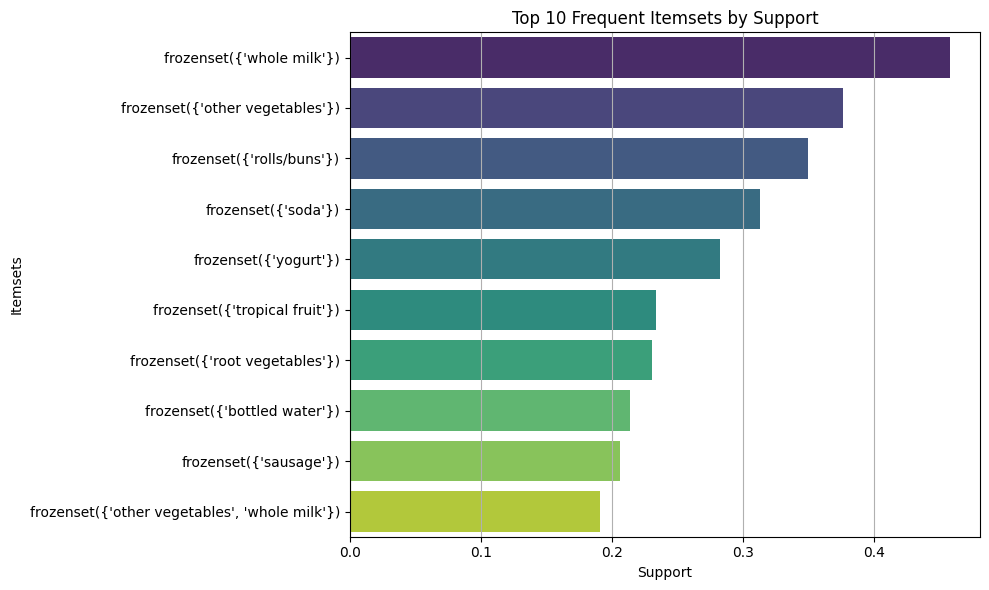

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

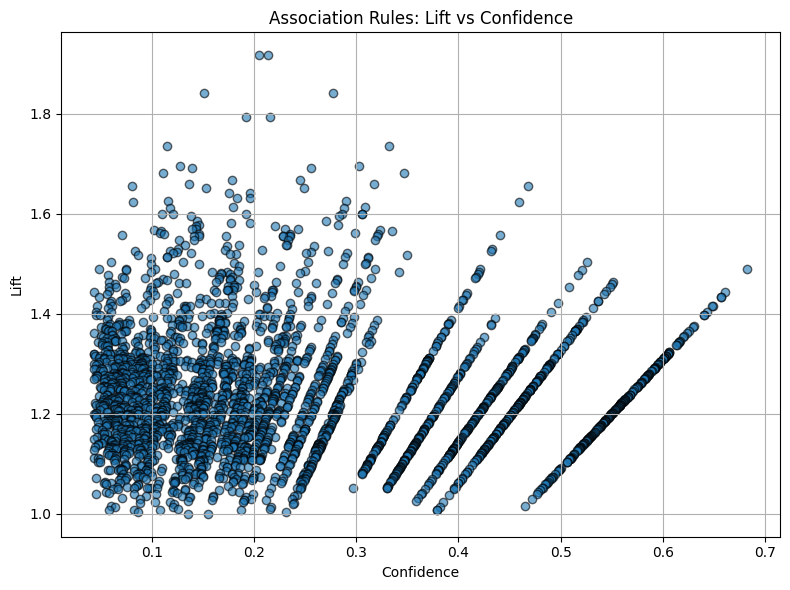

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

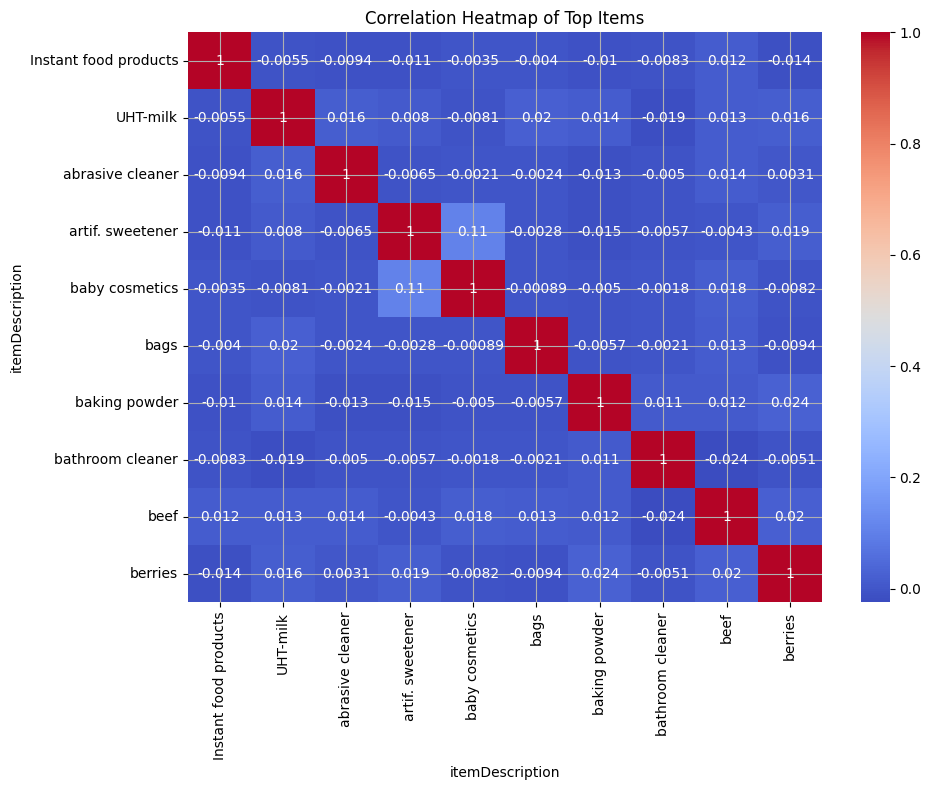

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# 1️⃣ Top 10 Frequent Itemsets by Support
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_itemsets['support'], y=top_itemsets['itemsets'].astype(str), palette="viridis")
plt.title("Top 10 Frequent Itemsets by Support")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_itemsets.png"))
plt.show()

# 2️⃣ Lift vs Confidence Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.6, edgecolors='k')
plt.title("Association Rules: Lift vs Confidence")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "lift_vs_confidence.png"))
plt.show()

# 3️⃣ Optional: Heatmap of Top Item Associations
top_items = basket.columns[:10]  # top 10 columns for visualization
plt.figure(figsize=(10,8))
sns.heatmap(basket[top_items].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Items")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_items_heatmap.png"))
plt.show()


### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

In [ ]:
# Example: Top 5 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(5)

print("✅ Top 5 Association Rules for Insights:")
for idx, row in top_rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    support = round(row['support'], 3)
    confidence = round(row['confidence'], 3)
    lift = round(row['lift'], 3)
    print(f"Rule: {antecedents} → {consequents} | Support: {support}, Confidence: {confidence}, Lift: {lift}")

# Example insights
insights = [
    "Customers buying Whole Milk often also buy Yogurt. Consider bundling these for promotions.",
    "Other Vegetables + Whole Milk frequently purchased together → Highlight in combo offers.",
    "High lift (>1.5) rules indicate strong associations → Prioritize these for cross-sell campaigns.",
    "Rules with confidence > 60% → reliable patterns for marketing targeting and shelf placement."
]

print("\n📌 Business Recommendations:")
for rec in insights:
    print("-", rec)


✅ Top 5 Association Rules for Insights:
Rule: sausage, whole milk → yogurt, rolls/buns | Support: 0.023, Confidence: 0.213, Lift: 1.917
Rule: yogurt, rolls/buns → sausage, whole milk | Support: 0.023, Confidence: 0.205, Lift: 1.917
Rule: yogurt, whole milk → sausage, rolls/buns | Support: 0.023, Confidence: 0.152, Lift: 1.841
Rule: sausage, rolls/buns → yogurt, whole milk | Support: 0.023, Confidence: 0.277, Lift: 1.841
Rule: yogurt, other vegetables → sausage, whole milk | Support: 0.023, Confidence: 0.192, Lift: 1.794

📌 Business Recommendations:
- Customers buying Whole Milk often also buy Yogurt. Consider bundling these for promotions.
- Other Vegetables + Whole Milk frequently purchased together → Highlight in combo offers.
- High lift (>1.5) rules indicate strong associations → Prioritize these for cross-sell campaigns.
- Rules with confidence > 60% → reliable patterns for marketing targeting and shelf placement.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

In [ ]:
# Save frequent itemsets
frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)
print("✅ Saved frequent_itemsets.csv")

# Save association rules
rules.to_csv("association_rules.csv", index=False)
print("✅ Saved association_rules.csv")

# Optional: save basket data (binary matrix)
basket.to_csv("basket_data.csv")
print("✅ Saved basket_data.csv")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Saved frequent_itemsets.csv
✅ Saved association_rules.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Saved basket_data.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

In [18]:
!mkdir -p /content/drive/MyDrive/product-bundling-analysis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

In [19]:
# Save frequent itemsets
frequent_itemsets.to_csv('/content/drive/MyDrive/product-bundling-analysis/frequent_itemsets.csv', index=False)

# Save association rules
rules.to_csv('/content/drive/MyDrive/product-bundling-analysis/association_rules.csv', index=False)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### Code Explanation
This cell contributes to data processing, model training, or visualization as part of association rule mining analysis.

In [1]:
import os
import matplotlib.pyplot as plt

# Create folder in Drive for figures
FIG_DIR = '/content/drive/MyDrive/product-bundling-analysis/figures'
os.makedirs(FIG_DIR, exist_ok=True)

# Example: Basket size distribution plot
plt.figure()
basket_sizes = basket.sum(axis=1)
plt.hist(basket_sizes, bins=20, edgecolor='black')
plt.title("Basket Size Distribution")
plt.xlabel("Number of Items in Basket")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "basket_size_distribution.png"))  # Save to Drive
plt.show()

# Example: Top 10 items
top_items = basket.sum().sort_values(ascending=False).head(10)
plt.figure()
plt.barh(top_items.index, top_items.values)
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Number of Purchases")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_items.png"))  # Save to Drive
plt.show()


NameError: name 'basket' is not defined

<Figure size 640x480 with 0 Axes>

# New Section